## Problem Statement:
A supermarket chain runs marketing campaigns with multiple offers on different products and services to boost sales. We needed to build a response model by leveraging the spend behavior and past campaign responses that can be used to devise a campaign strategy for achieving the objectives.

## Objectives:
To improve responses.The supermarket is actually looking to get more responses from their marketing campaigns.

To maximise the profit, maximise the return on investment made towards these marketing campaigns.`

### Importing the libraries

In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Warning Suppression

In [346]:
import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [347]:
df=pd.read_excel('marketing_campaign.xlsx')

#### Setting Display options to ensure feature name visibility

In [348]:
pd.set_option('display.max_columns',None)

### Data Preprocessing

In [349]:
df.shape 

(2240, 29)

In [350]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


ID: Unique identifier for each customer

Year_Birth: The birth year of the customer

Education: The educational background of the customer

Marital_Status: The marital status of the customer

Income: The annual income of the customer

Kidhome: The number of small children in the customer's household

Teenhome: The number of teenagers in the customer's household

Dt_Customer: The date when the customer was enrolled as a customer

Recency: The number of days since the last purchase made by the customer

MntWines: The amount spent by the customer on wine products

MntFruits: The amount spent by the customer on fruit products

MntMeatProducts: The amount spent by the customer on meat products

MntFishProducts: The amount spent by the customer on fish products

MntSweetProducts: The amount spent by the customer on sweet products

MntGoldProds: The amount spent by the customer on gold products

NumDealsPurchases: The number of purchases made by the customer with a discount

NumWebPurchases: The number of purchases made by the customer through the website

NumCatalogPurchases: The number of purchases made by the customer through catalog

NumStorePurchases: The number of purchases made by the customer directly from the store

NumWebVisitsMonth: The number of website visits made by the customer in a month

AcceptedCmp3-5: Flags indicating whether the customer accepted marketing campaigns 3 to 5

AcceptedCmp1-2: Flags indicating whether the customer accepted marketing campaigns 1 and 2

Complain: Flag indicating whether the customer has made any complaints

Z_CostContact: The cost of contacting the customer

Z_Revenue: The revenue generated from contacting the customer

Response: The target variable indicating whether the customer responded to the marketing campaign (1 = Yes, 0 = No)

#### Dropping ID column 

As ID column is not important as it does not provide any meaningful information so we will be dropping the ID column 

In [351]:
df = df.drop(columns=['ID'], axis=1)
print(df.head())

   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0      

###  Defining Target and Independent Features

In [352]:
Y=df[['Response']]  
X=df.drop(['Response'],axis=1) 

### Getting the Response Rate

In [353]:
Y.mean()

Response    0.149107
dtype: float64

The average response rate is near about 15%. So, 15 customers out of 100 customers are responding to the marketing campaign right now.

### Building Derived Features - Customer Age and Tenure

From the given columns 'Year_Birth' and 'Dt_Customer' we can find 'Age' and 'Cust_Tenure' (Customer Tenure) by taking it's difference  from the reference date.

In [354]:
import datetime
reference_date=datetime.datetime(2023,4,22)
print(reference_date)

2023-04-22 00:00:00


In [355]:
X['Year_Birth']=pd.to_datetime(df['Year_Birth'], format='%Y')
X['Age'] = (reference_date- X['Year_Birth']).astype('timedelta64[Y]')

X['Dt_Customer']=pd.to_datetime(X['Dt_Customer'])
X['Cust_Tenure'] = (reference_date- X['Dt_Customer']).astype('timedelta64[Y]')

As we got 'Age' and 'Cust_Tenure' we don't need Year_Birth and Dt_Customer columns, we drop the Year_Birth and Dt_Customer columns

In [356]:
X=X.drop(['Year_Birth','Dt_Customer'],axis=1)

In [357]:
X[['Age','Cust_Tenure']].head() #adding to dependent variables dataframe 

,Age,Cust_Tenure
0,66.0,10.0
1,69.0,9.0
2,58.0,9.0
3,39.0,9.0
4,42.0,9.0


### Split features into Numerical and Categorical

In [358]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")
print(num)
print(char)

       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2235  61223.0        0         1       46       709         43   
2236  64014.0        2         1       56       406          0   
2237  56981.0        0         0       91       908         48   
2238  69245.0        0         1        8       428         30   
2239  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1   

#### Finding unique levels in 'num' (Numerical Features)

Some numeric features like Kidhome, Teenhome have only 3 unique levels , even though it has been captured in a way where feature appears to be 'number' but we need to see if these features are continuous or not.
These features although they are numerical but the nature of the feature is that of a categorical feature.
We recognize these anomalies in the data by using a function called unique levels.

In [359]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [360]:
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
Income,1974
Kidhome,3
Teenhome,3
Recency,100
MntWines,776


We establish a threshold. For numerical features having feature_levels < 20 will be added to categorical feature

In [361]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

Kidhome                  int64
Teenhome                 int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Cust_Tenure            float64
dtype: object

As the features datatype is still integer, we need to convert the datatype into character so that they can be treated as the categorical variables and be merged back into the dataframe 'char'

In [362]:
def data_type_converter(x):
    x=x.astype('object')
    return(x)
cat=cat.apply(lambda x : data_type_converter(x))
cat.dtypes

Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Cust_Tenure            object
dtype: object

For numerical features having feature_levels > 20 will be added to numerical feature

In [363]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]
num

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,58138.0,58,635,88,546,172,88,88,66.0
1,46344.0,38,11,1,6,2,1,6,69.0
2,71613.0,26,426,49,127,111,21,42,58.0
3,26646.0,26,11,4,20,10,3,5,39.0
4,58293.0,94,173,43,118,46,27,15,42.0
...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,56.0
2236,64014.0,56,406,0,30,0,0,8,77.0
2237,56981.0,91,908,48,217,32,12,24,42.0
2238,69245.0,8,428,30,214,80,30,61,67.0


In [364]:
char=pd.concat([char,cat],axis=1,join="inner")

In [365]:
print ("The shape of numerical dataframe :",num.shape)
print ("The shape of categorical datafrme :",char.shape)

The shape of numerical dataframe : (2240, 9)
The shape of categorical datafrme : (2240, 18)


### Outlier Analysis of Numerical Features

We used percentile with the describe() to give a better sense of percentile wise distribution. There might be extreme values between min and 1st percentile and the max and 99th percentile 

In [366]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,54.194196
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,11.984069
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
1%,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,31.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,35.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,39.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,46.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,53.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,64.000000


Here we can see for Age column, 99% of customers are upto 76 years or lower . 1% of case of customer is 127 years which is a higher extreme values.

### Capping and Flooring of outliers

In [367]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [368]:
num=num.apply(lambda x : outlier_cap(x))

In [369]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51770.277076,49.101786,302.909821,26.158482,165.075446,37.351366,26.873688,43.770089,54.132143
std,20728.704775,28.949501,333.316827,39.208270,216.547373,53.985910,40.484302,51.118104,11.666094
min,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,31.000000
1%,7646.520000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,31.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,35.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,39.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,46.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,53.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,64.000000


There was a gap between the 99th percentile and max, but there is no such gap between them.Age for that 1% customer here now is also 78 years  

### Missing Value Handling - Numerical Features

Now, that we have taken care of outlier we can use mean to handle the missing values. As arithmetic mean is extremely susceptible to outliers.

In [370]:
num.isnull().mean()

Income              0.010714
Recency             0.000000
MntWines            0.000000
MntFruits           0.000000
MntMeatProducts     0.000000
MntFishProducts     0.000000
MntSweetProducts    0.000000
MntGoldProds        0.000000
Age                 0.000000
dtype: float64

### Missing Value Handling - Numerical Features (Imputation with Mean)¶

Here, we are using fillna() to fill in the missing values with the mean 

In [371]:
num['Income'] = num['Income'].fillna(num['Income'].mean())

In [372]:
num.isnull().mean()

Income              0.0
Recency             0.0
MntWines            0.0
MntFruits           0.0
MntMeatProducts     0.0
MntFishProducts     0.0
MntSweetProducts    0.0
MntGoldProds        0.0
Age                 0.0
dtype: float64

### Missing Value Handling - Categorical Features 

In [373]:
char.isnull().mean()

Education              0.0
Marital_Status         0.0
Kidhome                0.0
Teenhome               0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Cust_Tenure            0.0
dtype: float64

Here there are no missing values in the categorical features.

### Feature Selection - Numerical Features

#### Remove Features with 0 Variance-Variance Threshold
When a feature has 0 variance, it means that all the values in that feature are the same, providing no useful information for the analysis.

In [374]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num1 = num.iloc[:,cols]

In [375]:
num1.iloc[0]

Income              58138.0
Recency                58.0
MntWines              635.0
MntFruits              88.0
MntMeatProducts       546.0
MntFishProducts       172.0
MntSweetProducts       88.0
MntGoldProds           88.0
Age                    66.0
Name: 0, dtype: float64

As there were no feature with 0 variance, all the features gets selected.

### Bivariate Analysis (Feature Discretization)



By binning the numerical values, you are dividing them into discrete categories or intervals. This allows you to analyze 
the relationship between these categories and the response rate. Binning can help identify any patterns or 
trends in the response rate based on different ranges or levels of the binned feature.

In [376]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num1),index=num1.index, columns=num1.columns).add_suffix('_Rank')
num_binned.head()

,Income_Rank,Recency_Rank,MntWines_Rank,MntFruits_Rank,MntMeatProducts_Rank,MntFishProducts_Rank,MntSweetProducts_Rank,MntGoldProds_Rank,Age_Rank
0,5.0,5.0,8.0,8.0,9.0,8.0,7.0,8.0,8.0
1,4.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0
2,7.0,2.0,7.0,7.0,6.0,7.0,5.0,6.0,6.0
3,1.0,2.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0
4,6.0,9.0,4.0,6.0,6.0,6.0,6.0,3.0,1.0


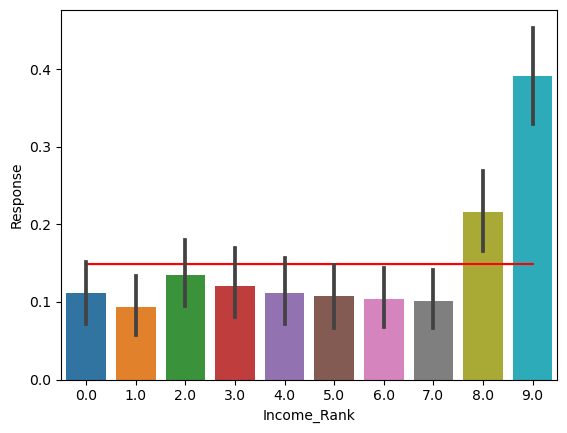

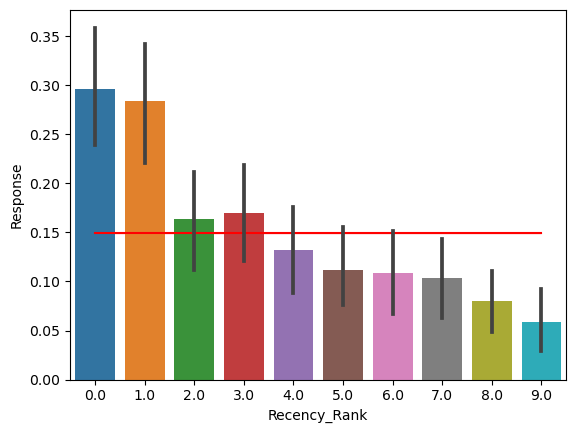

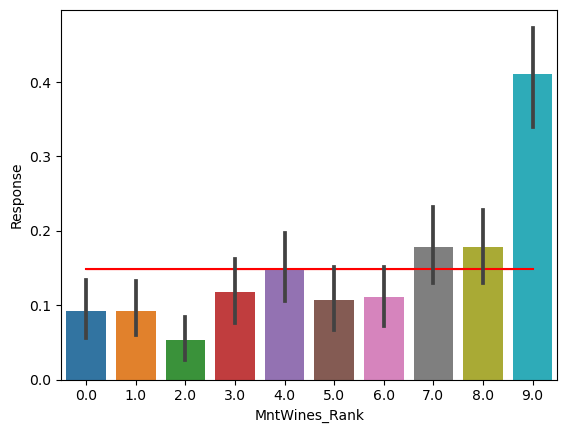

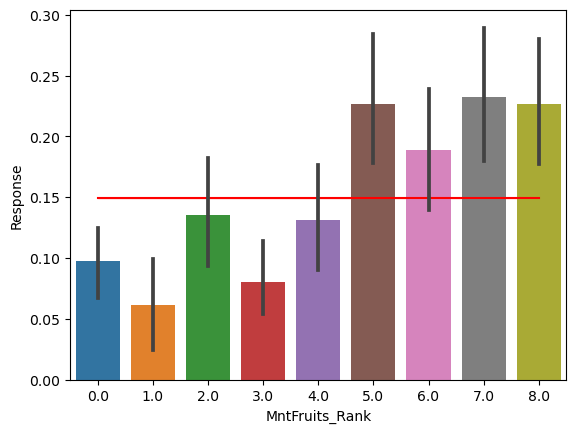

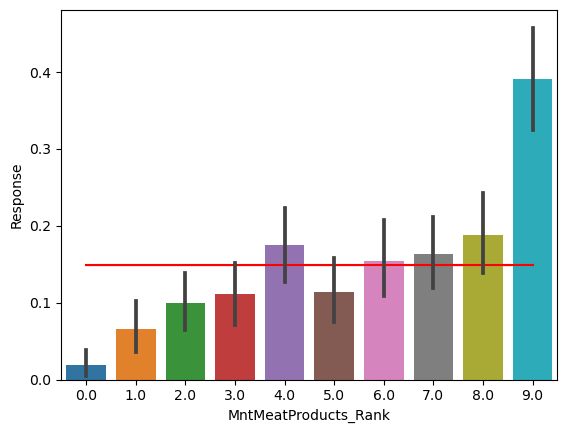

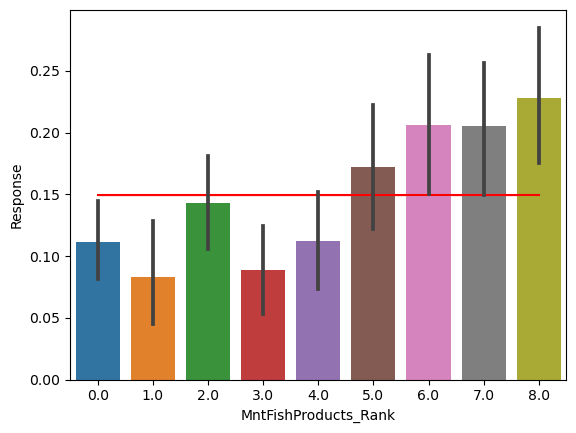

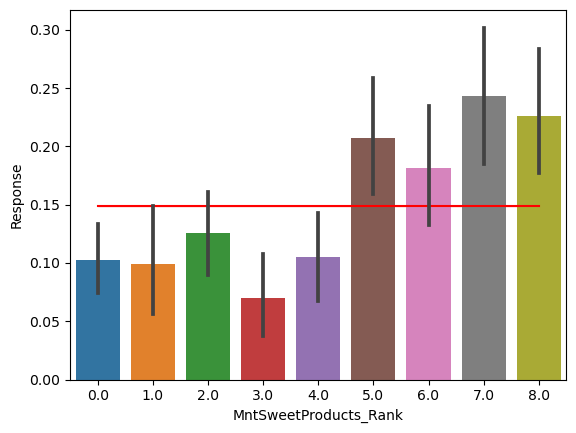

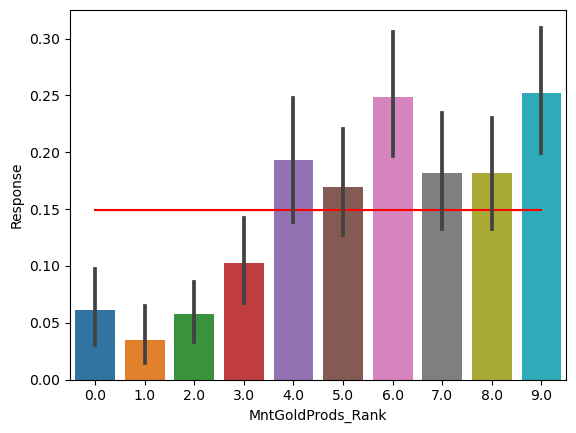

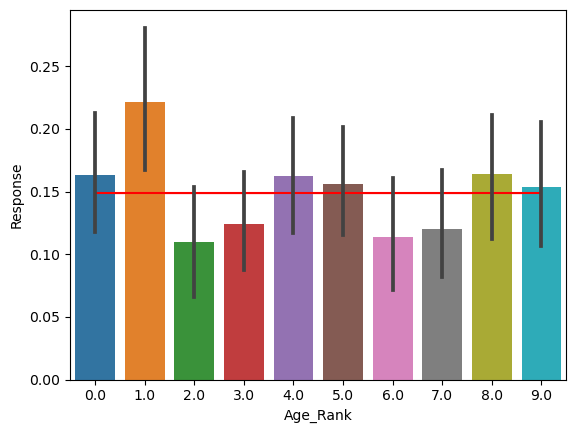

In [377]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Response'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="Response",data=X_bin_combined, estimator=mean )
plt.show()

Apart from age , all others are good predictors

In [378]:
num_droplist=['Age']
num1=num1.drop(num_droplist,axis=1)
num1.shape

(2240, 8)

### Select K best - Numeircal Features 

In [379]:
    from sklearn.feature_selection import SelectKBest, f_classif
    selector = SelectKBest(f_classif,k=6)
    selector.fit_transform(num1, Y)
    # Get columns to keep and create new dataframe with those only
    cols = selector.get_support(indices=True)
    select_features_df_num = num1.iloc[:,cols]

In [380]:
select_features_df_num.iloc[0]

Income             58138.0
Recency               58.0
MntWines             635.0
MntFruits             88.0
MntMeatProducts      546.0
MntGoldProds          88.0
Name: 0, dtype: float64

### Feature Selection - Categorical Features 

In [381]:
char.dtypes

Education              object
Marital_Status         object
Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Cust_Tenure            object
dtype: object

In [382]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x)))

In [383]:
char_unique_levels

,0
Education,5
Marital_Status,8
Kidhome,3
Teenhome,3
NumDealsPurchases,15
NumWebPurchases,15
NumCatalogPurchases,14
NumStorePurchases,14
NumWebVisitsMonth,16
AcceptedCmp3,2


In [384]:
char_unique_levels.columns=['feature_levels']
slice1=char_unique_levels.loc[char_unique_levels['feature_levels']>1]
cat_list=slice1.index
char=char.loc[:,cat_list]

### Feature Selection - Categorical Features

### Part 1 - Bi Variate Analysis

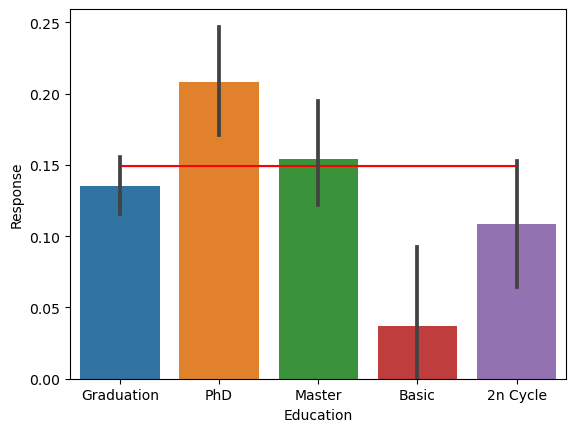

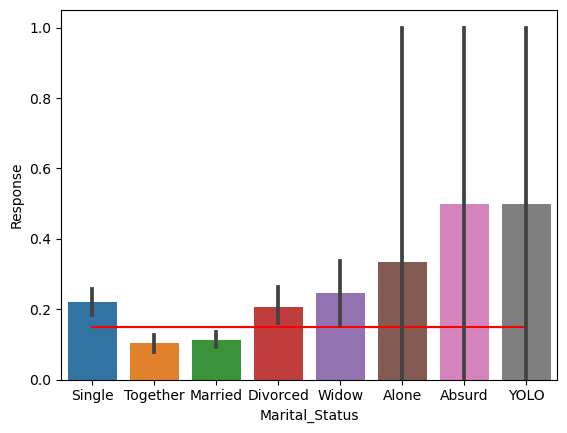

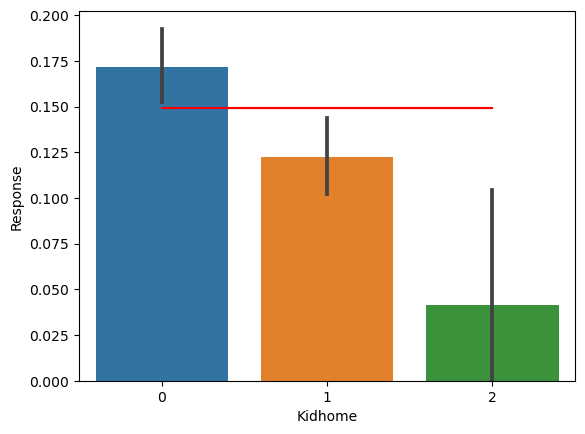

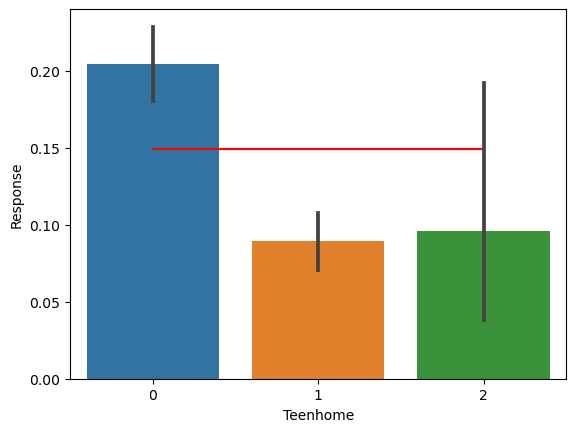

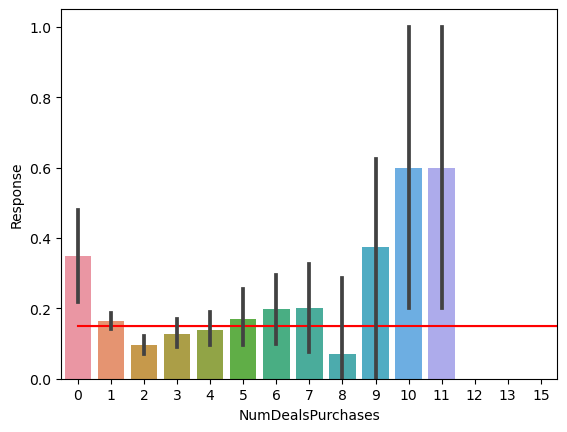

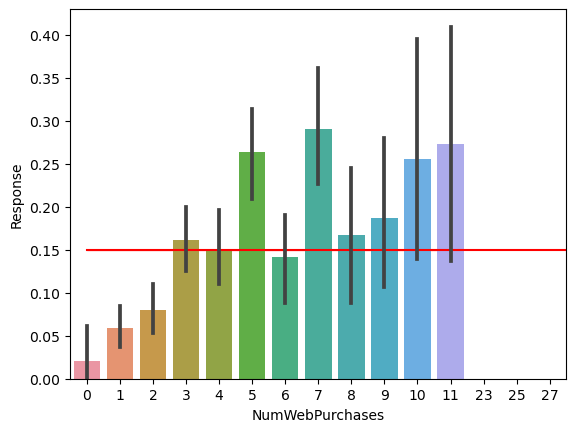

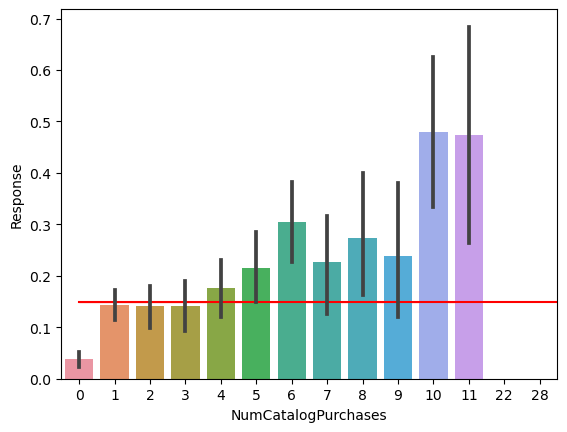

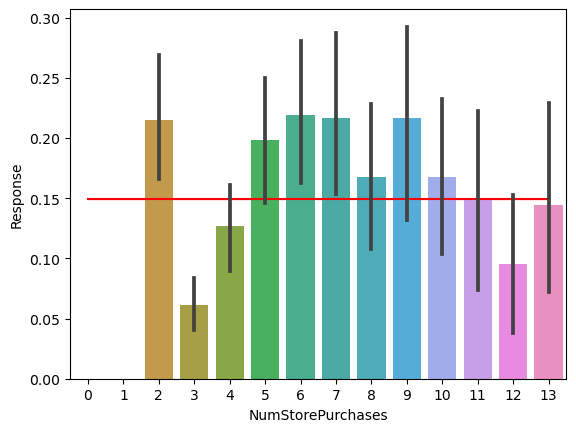

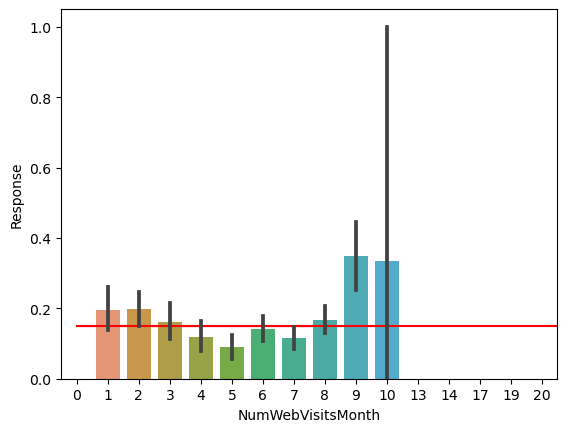

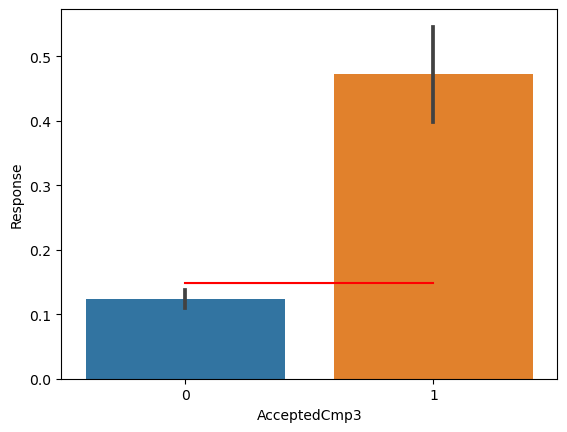

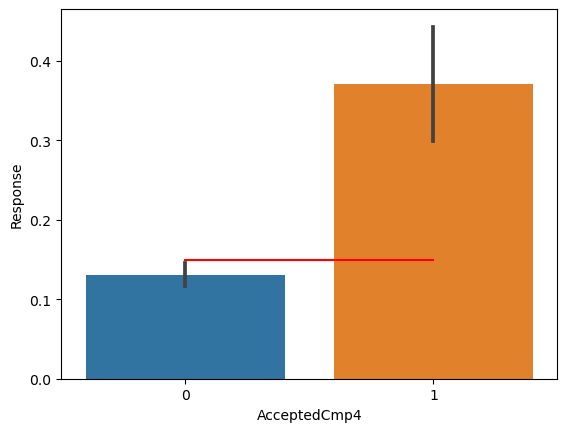

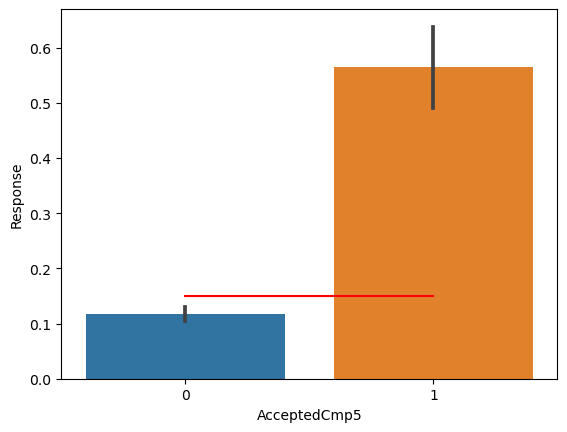

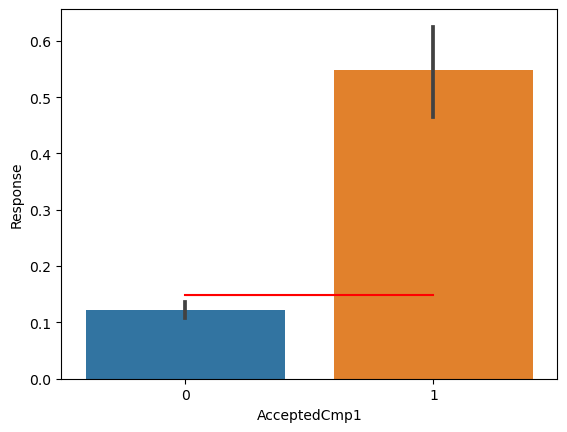

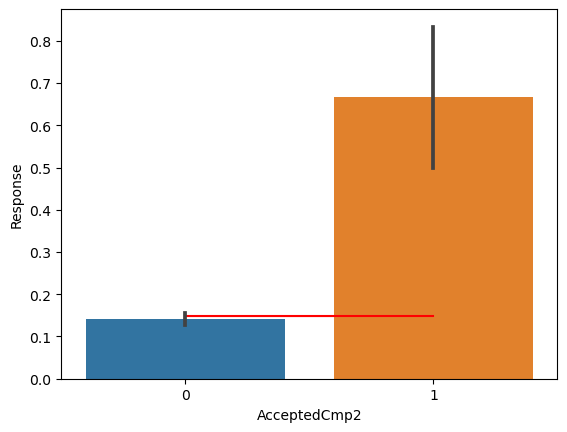

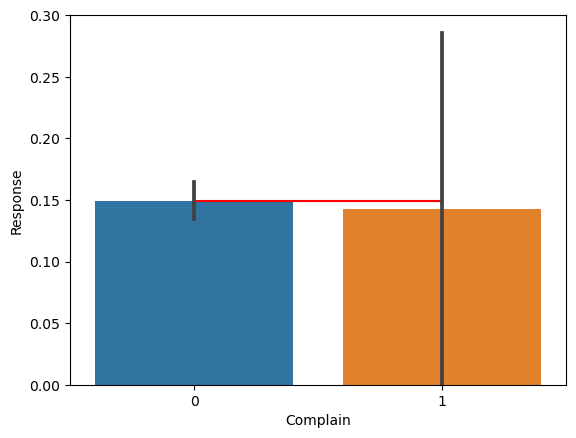

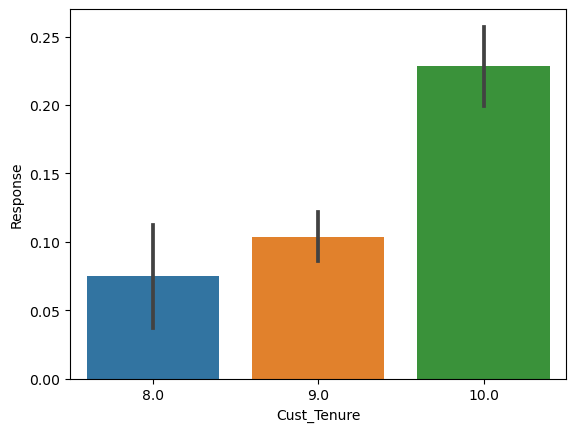

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['Response'].mean(),data=X_char_merged,color='red')
    sns.barplot(x=col, y="Response",data=X_char_merged, estimator=mean )
plt.show()

In [386]:
char.dtypes

Education              object
Marital_Status         object
Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Cust_Tenure            object
dtype: object

In [387]:
char_droplist=['Education','NumStorePurchases','Complain']
char=char.drop(char_droplist,axis=1)
char.shape

(2240, 13)

In [388]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(2240, 74)

### Part 2 - Select K Best

In [389]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=70)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [390]:
select_features_df_char.dtypes

Marital_Status_Alone       uint8
Marital_Status_Divorced    uint8
Marital_Status_Married     uint8
Marital_Status_Single      uint8
Marital_Status_Together    uint8
                           ...  
AcceptedCmp5_1             uint8
AcceptedCmp1_1             uint8
AcceptedCmp2_1             uint8
Cust_Tenure_9.0            uint8
Cust_Tenure_10.0           uint8
Length: 70, dtype: object

In [391]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

## Model Building

### Train Test Split

In [392]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=20)

In [393]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (1568, 76)
Shape of Testing Data (672, 76)
Response Rate in Training Data Response    0.149872
dtype: float64
Response Rate in Testing Data Response    0.147321
dtype: float64


### Building Logistic Regression Model

In [394]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=20)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=20)

### Building Decision Tree Model

In [395]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=20)

### Grid Search for Model Optimization

In [396]:
# Min_Samples_Split starting from 5% of training base
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [75,100,125,150] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 75}


In [397]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=75)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=75, random_state=20)

### Building Random Forest Model

In [398]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=75)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=75, random_state=20)

### Building Gradient Boosting Model

In [399]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=20,max_depth=5,min_samples_split=75)
gbm.fit(X_train,y_train)



GradientBoostingClassifier(criterion='mse', max_depth=5, min_samples_split=75,
                           random_state=20)

## Model Evaluation

In [400]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [401]:
print("Accuracy from Logistic Regression Model :",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision from Logistic Regression Model :",metrics.precision_score(y_test,y_pred_logreg))
print("Recall from Logistic Regression Model :",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score from Logistic Regression Model :",metrics.f1_score(y_test,y_pred_logreg))
print("Area under ROC Curve from Logistic Regression Model :",metrics.roc_auc_score(y_test,y_pred_logreg))


Accuracy from Logistic Regression Model : 0.8630952380952381
Precision from Logistic Regression Model : 0.6129032258064516
Recall from Logistic Regression Model : 0.1919191919191919
f1_score from Logistic Regression Model : 0.29230769230769227
Area under ROC Curve from Logistic Regression Model : 0.5854883917711142


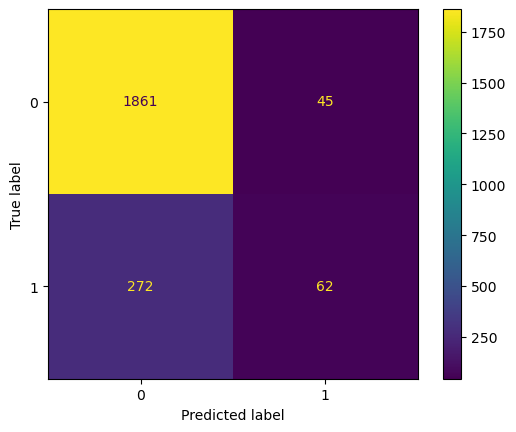

In [402]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [403]:
print("Accuracy from Decision Tree Model :",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision from Decision Tree Model :",metrics.precision_score(y_test,y_pred_tree))
print("Recall from Decision Tree Model :",metrics.recall_score(y_test,y_pred_tree))
print("f1_score from Decision Tree Model :",metrics.f1_score(y_test,y_pred_tree))
print("Area under ROC Curve from Decision Tree Model :",metrics.roc_auc_score(y_test,y_pred_tree))


Accuracy from Decision Tree Model : 0.8854166666666666
Precision from Decision Tree Model : 0.7391304347826086
Recall from Decision Tree Model : 0.3434343434343434
f1_score from Decision Tree Model : 0.4689655172413793
Area under ROC Curve from Decision Tree Model : 0.66124596752869


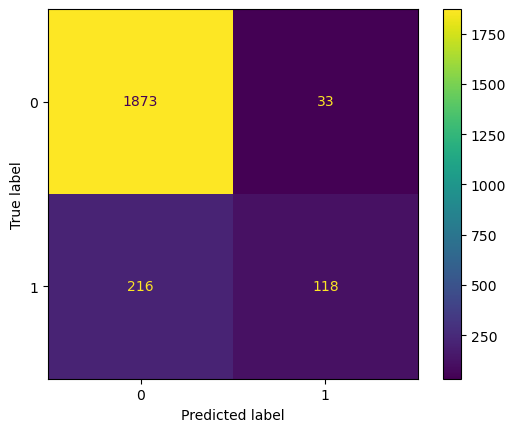

In [404]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [405]:
print("Accuracy from Random Forest Model :",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision from Random Forest Model :",metrics.precision_score(y_test,y_pred_rf))
print("Recall from Random Forest Model :",metrics.recall_score(y_test,y_pred_rf))
print("f1_score from Random Forest Model :",metrics.f1_score(y_test,y_pred_rf))
print("Area under ROC Curve from Random Forest Model :",metrics.roc_auc_score(y_test,y_pred_rf))


Accuracy from Random Forest Model : 0.8556547619047619
Precision from Random Forest Model : 1.0
Recall from Random Forest Model : 0.020202020202020204
f1_score from Random Forest Model : 0.03960396039603961
Area under ROC Curve from Random Forest Model : 0.51010101010101


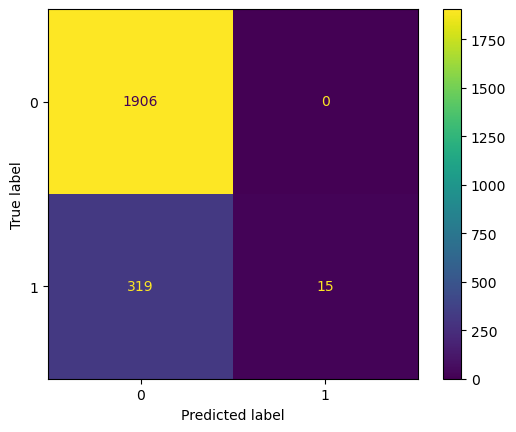

In [406]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [407]:
print("Accuracy from GBM Model :",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision from GBM Model :",metrics.precision_score(y_test,y_pred_gbm))
print("Recall from GBM Model :",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score from GBM Model :",metrics.f1_score(y_test,y_pred_gbm))
print("Area under ROC Curve from Random Forest Model :",metrics.roc_auc_score(y_test,y_pred_gbm))

Accuracy from GBM Model : 0.8854166666666666
Precision from GBM Model : 0.671875
Recall from GBM Model : 0.43434343434343436
f1_score from GBM Model : 0.5276073619631902
Area under ROC Curve from Random Forest Model : 0.6988471098418743


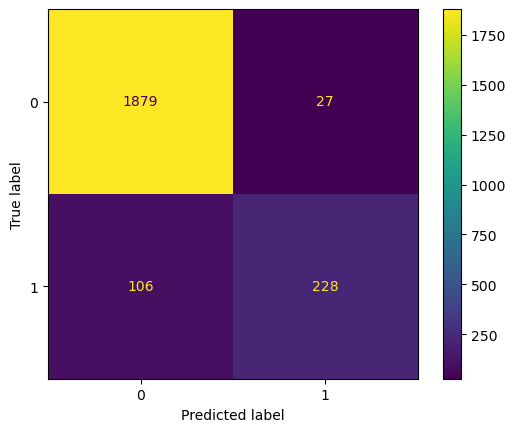

In [408]:

metrics.plot_confusion_matrix(gbm,X_all,Y)

## Project Conclusion :-

#### F1 Score for GBM model is greater than the others, so GBM has performed better than the other models and will be used for campaign strategizing

## Extracting Feature Importance from the best model

In [409]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances.shape

(76, 1)

## Extracting the Top 10 Important Model Features

In [410]:
feature_importances.iloc[0:10]

,importance
AcceptedCmp5_1,0.146884
Recency,0.146853
MntMeatProducts,0.100070
AcceptedCmp3_1,0.077856
MntWines,0.068084
Income,0.057541
AcceptedCmp1_1,0.048763
Cust_Tenure_10.0,0.046658
NumWebVisitsMonth_9,0.039588
MntGoldProds,0.028559


# Plotting the top 10 feature importances in a Horizontal Bar Plot

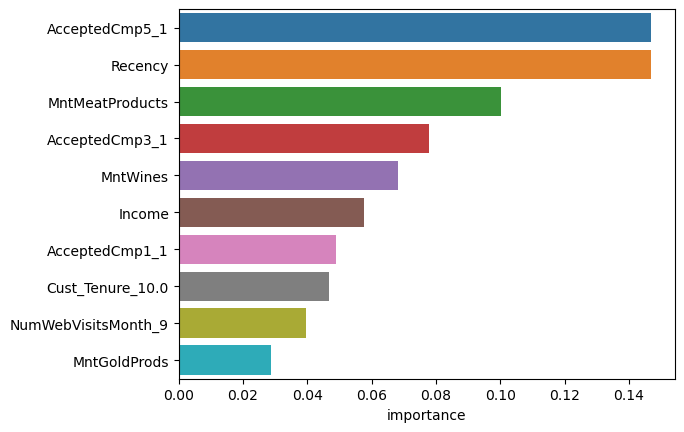

In [411]:
ax=sns.barplot(x='importance',y=feature_importances.iloc[0:10].index,data=feature_importances.iloc[0:10])

### Getting the Model Probabilities

Calculating model predicted probabilities helps us understand how confident the model is in its predictions

Allow us to evaluate the performance of the model, thus allow us to make better decisions.

In [412]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]  
df['pred_prob']=pd.DataFrame(y_pred_prob)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,pred_prob
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.736701
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.015083
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.012446
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.010432
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.005122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,0.007339
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,0.012029
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,0.036108
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,0.054833


### Creating Rank based on the Model Probabilities
Assign percentile ranks to the values in the 'pred_prob' column of a DataFrame and the resulting ranks are stored in a new column called 'P_Rank_model'.
The purpose of this code is to create a new column, 'P_Rank_model', that represents the percentile rank of each 'pred_prob' value. This can be useful for further analysis, visualization, or grouping the data based on its predicted probabilities. The resulting column provides information about the relative position of each 'pred_prob' value within the distribution of the data.

By using percentiles and dividing the data into equal-sized bins, this approach allows for a more balanced representation of the data, even if the distribution is skewed or has outliers.

In [413]:
df['P_Rank_model']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1 ##qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins
df[['pred_prob','P_Rank_model']].head()

,pred_prob,P_Rank_model
0,0.736701,10
1,0.015083,3
2,0.012446,3
3,0.010432,2
4,0.005122,1


# Utlize APT framework to build a Machine Learning Driven Strategy

# A - Audience (Who do we target?)

We can categorize the predicted response ranks into two groups: "Top 2" for values with a percentile rank of 9 or higher, and 
"Bottom 8" for values with a percentile rank below 9. The resulting 'Predicted_Resp_Rank' column allows for easy identification and 
analysis of the top andbottom ranked predictions based on the 'P_Rank_gbm' values.

In [414]:
df['Predicted_Resp_Rank']=np.where(df['P_Rank_model']>=9,"Top 2","Bottom 8")
df['Predicted_Resp_Rank'].value_counts()

Bottom 8    1792
Top 2        448
Name: Predicted_Resp_Rank, dtype: int64

In [415]:
df_top2=df.loc[df['Predicted_Resp_Rank']=="Top 2",:]
df_top2.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,pred_prob,P_Rank_model,Predicted_Resp_Rank
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.736701,10,Top 2
15,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1,0.981453,10,Top 2
18,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,0.206421,9,Top 2
33,1952,PhD,Divorced,46610.0,0,2,2012-10-29,8,96,12,96,33,22,43,6,4,1,6,6,0,0,0,0,0,0,3,11,1,0.213164,9,Top 2
39,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,3,11,1,0.866771,10,Top 2


# P - Prioritization (Based on Business Value and Customer Engagement)

In [416]:
df_top2['spend_cnt']=np.count_nonzero(df_top2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']],axis=1)
df_top2['spend_cnt'].describe()

count    448.000000
mean       5.582589
std        0.766969
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        6.000000
Name: spend_cnt, dtype: float64

In [417]:
df_top2['Engagement']=np.where(df_top2['spend_cnt']<df_top2['spend_cnt'].quantile(0.75),"Low","High")
df_top2['Engagement'].value_counts()

High    319
Low     129
Name: Engagement, dtype: int64

In [418]:
df_top2['Total_Spend']=df_top2['MntWines']+df_top2['MntFruits']+df_top2['MntMeatProducts']+df_top2['MntFishProducts']+df_top2['MntSweetProducts']+df_top2['MntGoldProds']
df_top2['Total_Spend'].describe()

count     448.000000
mean      994.604911
std       718.041590
min        12.000000
25%       268.000000
50%      1065.000000
75%      1629.000000
max      2525.000000
Name: Total_Spend, dtype: float64

In [419]:
df_top2['spend_level']=np.where(df_top2['Total_Spend']<df_top2['Total_Spend'].quantile(0.75),"Low Spend","High Spend")
df_top2['spend_level'].value_counts()

Low Spend     336
High Spend    112
Name: spend_level, dtype: int64

In [420]:
pd.crosstab(index=df_top2['spend_level'], columns=df_top2['Engagement'],values=df_top2['Response'],aggfunc='mean')

Engagement,High,Low
spend_level,,
High Spend,0.741573,0.652174
Low Spend,0.686957,0.594340


In [421]:
pd.crosstab(index=df_top2['spend_level'], columns=df_top2['Engagement'],values=df_top2['Response'],aggfunc='count')

Engagement,High,Low
spend_level,,
High Spend,89,23
Low Spend,230,106


In [422]:
df_priority_1=df_top2.loc[(df_top2['spend_level']=='High Spend') & (df_top2['Engagement']=='Low'),:]
df_priority_1.shape

(23, 35)

The customers with high spend, can contribute significantly to the revenue of the supermarket and can make higher value purchases
So, we are targeting such customers with high spend and low engagement to increase their engagement.

In [423]:
df_priority_1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,pred_prob,P_Rank_model,Predicted_Resp_Rank,spend_cnt,Engagement,Total_Spend,spend_level
18,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,0.206421,9,Top 2,5,Low,1782,High Spend
126,1984,Graduation,Single,79607.0,0,0,2013-04-21,37,450,133,951,173,0,216,1,3,6,6,1,0,0,0,0,0,0,3,11,1,0.912070,10,Top 2,5,Low,1923,High Spend
246,1972,Graduation,Married,80134.0,1,0,2013-05-20,40,1218,16,272,104,0,80,2,5,3,6,6,0,1,1,1,0,0,3,11,1,0.848079,10,Top 2,5,Low,1690,High Spend
424,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,3,11,0,0.289129,9,Top 2,5,Low,2119,High Spend
519,1944,Master,Married,80184.0,0,0,2014-03-01,19,1035,134,670,25,38,0,1,6,3,10,3,0,0,1,1,0,0,3,11,0,0.333449,9,Top 2,5,Low,1902,High Spend
523,1953,Graduation,Married,70503.0,0,0,2012-09-30,73,1379,33,216,0,33,66,1,2,4,9,6,0,1,1,0,0,0,3,11,0,0.209323,9,Top 2,5,Low,1727,High Spend
543,1982,PhD,Married,84169.0,0,0,2013-08-07,9,1478,19,403,0,19,0,1,7,6,6,3,0,1,1,0,0,0,3,11,1,0.921667,10,Top 2,4,Low,1919,High Spend
586,1955,Graduation,Widow,79800.0,0,0,2012-09-23,65,1060,21,530,32,0,224,1,5,11,5,3,1,0,1,1,0,0,3,11,1,0.960845,10,Top 2,5,Low,1867,High Spend
644,1947,Master,Together,77632.0,0,0,2013-03-10,73,1200,105,758,0,42,147,1,4,2,6,2,0,1,1,0,0,0,3,11,1,0.562317,9,Top 2,5,Low,2252,High Spend
735,1949,Graduation,Married,72025.0,0,0,2014-04-29,46,967,0,617,43,50,0,1,4,8,13,2,0,1,1,1,0,0,3,11,1,0.792184,10,Top 2,4,Low,1677,High Spend


In [424]:
df_priority_2=df_top2.loc[(df_top2['spend_level']=='High Spend') & (df_top2['Engagement']=='High'),:]
df_priority_2.shape

(89, 35)

In [425]:
df_priority_3=df_top2.loc[(df_top2['spend_level']=='Low Spend') & (df_top2['Engagement']=='High'),:]
df_priority_3.shape

(230, 35)

In [426]:
df_priority_4=df_top2.loc[(df_top2['spend_level']=='Low Spend') & (df_top2['Engagement']=='Low'),:]
df_priority_4.shape

(106, 35)

# T - Treatment (Identify Service/Product Preferences of each Priority Segment)

In [427]:
spend_cat_priority1=df_priority_1[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [428]:
spend_avg = spend_cat_priority1.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            1123.173913
MntMeatProducts      550.956522
MntGoldProds          90.260870
MntFishProducts       52.565217
MntFruits             42.739130
MntSweetProducts      25.739130
dtype: float64

In [429]:
spend_cat_priority2=df_priority_2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [430]:
spend_avg = spend_cat_priority2.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            928.000000
MntMeatProducts     665.011236
MntFishProducts     103.078652
MntGoldProds         80.730337
MntSweetProducts     78.674157
MntFruits            72.887640
dtype: float64

In [431]:
spend_cat_priority3=df_priority_3[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [432]:
spend_avg = spend_cat_priority3.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            337.404348
MntMeatProducts     205.965217
MntGoldProds         59.247826
MntFishProducts      51.043478
MntSweetProducts     36.452174
MntFruits            33.560870
dtype: float64

In [433]:
spend_cat_priority4=df_priority_4[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [434]:
spend_avg = spend_cat_priority4.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            385.490566
MntMeatProducts     135.283019
MntGoldProds         45.103774
MntFishProducts      16.075472
MntFruits            12.849057
MntSweetProducts     10.358491
dtype: float64

# Strategy build for creating the campaign :

1) Audience should be the top 20% of the people as per the ranked data. This would lead to 80% reduction in Marketing cost and higher response rate.

2) 1st Priority : People with Low Engagement and High Spend

   2nd Priority : People with High Engagement and High Spend
    
   3rd Priority : People with High Engagement and Low Spend
    
   4th Proirity : People with Low Engagement and Low Spend
    
3) The best offers should be provided on the following products:
   Wines/Fish/Meat/Gold

    


# Objective of the Project
Leverage the spend behavior and past campaign responses to build a response model that can
be used to devise a strategy that enhances the response rates and improves profitability of marketing campaigns

# Algorithms Used :
In this project we have used Logistic Regression, Decision Tree, Random Forest, Gradient Boosting Machine 

# Final Model Algorithm
Among the models that we tried building the radient Boosting Machine   performed the best in terms of F1_Score

Therefore we have kept Gradient Boosting Machine  as the final model algorithm

# Grid Search CV parameters
Maximum Depth of Tree - 6

Minimum Sample Size for Nodes to be Split - 75 Observations

# Model Performance Measures
Accuracy from GBM Model : 0.885

Precision from GBM Model : 0.671

Recall from GBM Model : 0.4343

f1_score from GBM Model : 0.527
Area under ROC Curve from Random Forest Model : 0.698